In [ ]:
# LDA GENSIM

#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /home/mailan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import nltk

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
import spacy

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importer le dataset

df = pd.read_csv("./df_final.csv")

# ne garder que les annonces

df=df["Annonces lemmatisées sans stopwords"]
data= df.values.tolist()
pprint(data[:1])

['24 an , extérieur agréable , recevoir éducation , joindre talen utile sexe , '
 'ceuture linge broderie , connoissant détail ménage , rendroit utile , '
 'desireroit placeb , comptoir maison . bien     écrire compter ; accepteroit '
 'place femme-de-chambre , consentiroit aller ville départe - ment , pays '
 'étranger . fournir - bon ré-pondan . ad . écrire vif voix , sujet , rue S. '
 'Thomas-du-Louvre , vis-à-vis écurie - dev .']


In [ ]:
#tokenization

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data= list(sent_to_words(data))

print(data[:1])

[['an', 'exterieur', 'agreable', 'recevoir', 'education', 'joindre', 'talen', 'utile', 'sexe', 'ceuture', 'linge', 'broderie', 'connoissant', 'detail', 'menage', 'rendroit', 'utile', 'desireroit', 'placeb', 'comptoir', 'maison', 'bien', 'ecrire', 'compter', 'accepteroit', 'place', 'femme', 'de', 'chambre', 'consentiroit', 'aller', 'ville', 'departe', 'ment', 'pays', 'etranger', 'fournir', 'bon', 're', 'pondan', 'ad', 'ecrire', 'vif', 'voix', 'sujet', 'rue', 'thomas', 'du', 'louvre', 'vis', 'vis', 'ecurie', 'dev']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data[0]]])

['an', 'exterieur_agreable', 'recevoir', 'education', 'joindre', 'talen', 'utile', 'sexe', 'ceuture', 'linge', 'broderie', 'connoissant', 'detail', 'menage', 'rendroit_utile', 'desireroit', 'placeb', 'comptoir', 'maison', 'bien', 'ecrire', 'compter', 'accepteroit', 'place', 'femme', 'de', 'chambre', 'consentiroit', 'aller', 'ville', 'departe_ment', 'pays_etranger', 'fournir', 'bon', 're_pondan', 'ad', 'ecrire', 'vif', 'voix', 'sujet', 'rue', 'thomas', 'du', 'louvre', 'vis', 'vis', 'ecurie', 'dev']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data)

# Create Corpus
texts = data

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 2), (49, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('accepteroit', 1),
  ('ad', 1),
  ('agreable', 1),
  ('aller', 1),
  ('an', 1),
  ('bien', 1),
  ('bon', 1),
  ('broderie', 1),
  ('ceuture', 1),
  ('chambre', 1),
  ('compter', 1),
  ('comptoir', 1),
  ('connoissant', 1),
  ('consentiroit', 1),
  ('de', 1),
  ('departe', 1),
  ('desireroit', 1),
  ('detail', 1),
  ('dev', 1),
  ('du', 1),
  ('ecrire', 2),
  ('ecurie', 1),
  ('education', 1),
  ('etranger', 1),
  ('exterieur', 1),
  ('femme', 1),
  ('fournir', 1),
  ('joindre', 1),
  ('linge', 1),
  ('louvre', 1),
  ('maison', 1),
  ('menage', 1),
  ('ment', 1),
  ('pays', 1),
  ('place', 1),
  ('placeb', 1),
  ('pondan', 1),
  ('re', 1),
  ('recevoir', 1),
  ('rendroit', 1),
  ('rue', 1),
  ('sexe', 1),
  ('sujet', 1),
  ('talen', 1),
  ('thomas', 1),
  ('utile', 2),
  ('vif', 1),
  ('ville', 1),
  ('vis', 2),
  ('voix', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=40,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(13,
  '0.000*"dixaine" + 0.000*"communique" + 0.000*"lustrieux" + 0.000*"guerie" + '
  '0.000*"fauver" + 0.000*"soldin" + 0.000*"brodier" + 0.000*"veyron" + '
  '0.000*"sydow" + 0.000*"apothicairerie"'),
 (20,
  '0.000*"dixaine" + 0.000*"communique" + 0.000*"lustrieux" + 0.000*"guerie" + '
  '0.000*"fauver" + 0.000*"soldin" + 0.000*"brodier" + 0.000*"veyron" + '
  '0.000*"sydow" + 0.000*"apothicairerie"'),
 (38,
  '0.000*"dixaine" + 0.000*"communique" + 0.000*"lustrieux" + 0.000*"guerie" + '
  '0.000*"fauver" + 0.000*"soldin" + 0.000*"brodier" + 0.000*"veyron" + '
  '0.000*"sydow" + 0.000*"apothicairerie"'),
 (32,
  '0.000*"dixaine" + 0.000*"communique" + 0.000*"lustrieux" + 0.000*"guerie" + '
  '0.000*"fauver" + 0.000*"soldin" + 0.000*"brodier" + 0.000*"veyron" + '
  '0.000*"sydow" + 0.000*"apothicairerie"'),
 (12,
  '0.000*"dixaine" + 0.000*"communique" + 0.000*"lustrieux" + 0.000*"guerie" + '
  '0.000*"fauver" + 0.000*"soldin" + 0.000*"brodier" + 0.000*"veyron" + '
  '0.000*"sydow

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -46.2772712717335

Coherence Score:  0.38437055290590677


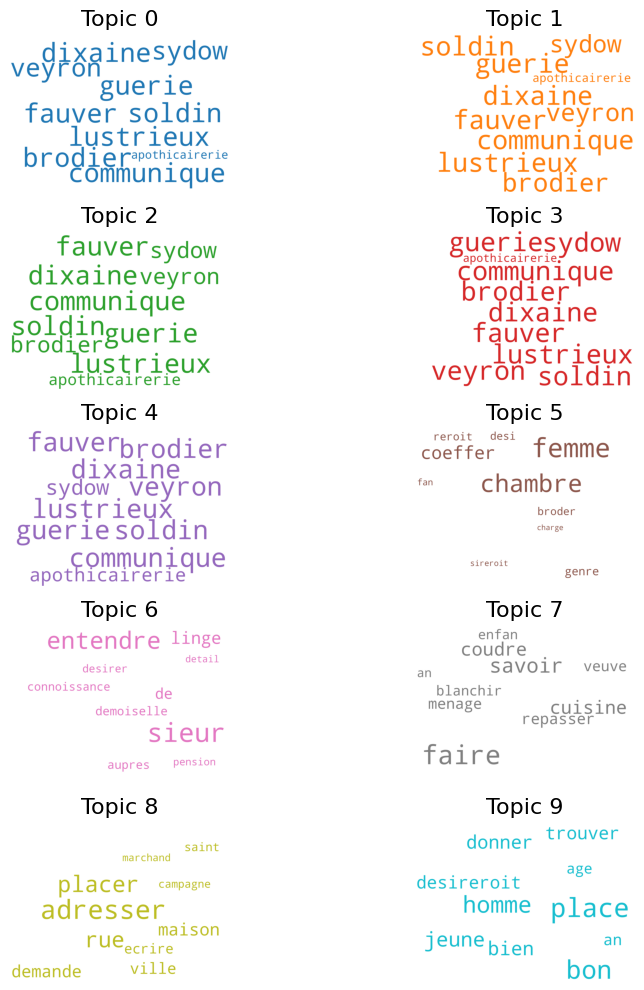

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='cmap2',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()